# 從steam的遊戲語言和tag來找出相關

資料來源:kaggle.com  
https://www.kaggle.com/trolukovich/steam-games-complete-dataset

In [1]:
import numpy as ny
import pandas as pd
from tqdm import tqdm_notebook
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df=pd.read_csv('steam_games.csv')
print('total game:',len(df))
df.head()

total game: 40833


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


## 先把沒有名字 沒有tag 沒有評論的清掉

In [3]:
df=pd.read_csv('steam_games.csv')
df=df[['name','popular_tags','languages','all_reviews']].dropna(axis=0)
df=df[['name','popular_tags','languages']]
df=df.reset_index(drop=True)
print('total game:',len(df))
df.head()

total game: 28402


,name,popular_tags,languages
0,DOOM,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","English,French,Italian,German,Spanish - Spain,..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","English,Korean,Simplified Chinese,French,Germa..."
2,BATTLETECH,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","English,French,German,Russian"
3,DayZ,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","English,French,Italian,German,Spanish - Spain,..."
4,EVE Online,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","English,German,Russian,French"


## 把每個遊戲的tag和語言合成一個list

In [4]:
corpus_tags = df['popular_tags'][0]
corpus_languages=df['languages'][0]
list_data=corpus_tags+','+corpus_languages
list_data

'FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,Singleplayer,Fast-Paced,Sci-fi,Horror,Classic,Atmospheric,Difficult,Blood,Remake,Zombies,Co-op,Memes,English,French,Italian,German,Spanish - Spain,Japanese,Polish,Portuguese - Brazil,Russian,Traditional Chinese'

In [5]:
list_data=[]
for i in range(len(df)):
    corpus_tags = df['popular_tags'][i]
    corpus_languages=df['languages'][i]
    list0=corpus_tags+','+corpus_languages   #把每個game的tag和語言合成 注意要加逗號
    list0=list0.split(',')                   #把合成字串的list0用逗號分成一個list
    list_data.append(list0)
list_data

[['FPS',
  'Gore',
  'Action',
  'Demons',
  'Shooter',
  'First-Person',
  'Great Soundtrack',
  'Multiplayer',
  'Singleplayer',
  'Fast-Paced',
  'Sci-fi',
  'Horror',
  'Classic',
  'Atmospheric',
  'Difficult',
  'Blood',
  'Remake',
  'Zombies',
  'Co-op',
  'Memes',
  'English',
  'French',
  'Italian',
  'German',
  'Spanish - Spain',
  'Japanese',
  'Polish',
  'Portuguese - Brazil',
  'Russian',
  'Traditional Chinese'],
 ['Survival',
  'Shooter',
  'Multiplayer',
  'Battle Royale',
  'PvP',
  'FPS',
  'Third-Person Shooter',
  'Action',
  'Online Co-Op',
  'Tactical',
  'Co-op',
  'First-Person',
  'Early Access',
  'Strategy',
  'Competitive',
  'Third Person',
  'Team-Based',
  'Difficult',
  'Simulation',
  'Stealth',
  'English',
  'Korean',
  'Simplified Chinese',
  'French',
  'German',
  'Spanish - Spain',
  'Arabic',
  'Japanese',
  'Polish',
  'Portuguese',
  'Russian',
  'Turkish',
  'Thai',
  'Italian',
  'Portuguese - Brazil',
  'Traditional Chinese',
  'Ukrainia

## one-hot encoded pandas DataFrame 讀入#

In [32]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(list_data).transform(list_data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,1980s,1990's,2.5D,2D,2D Fighter,360 Video,3D,3D Platformer,3D Vision,4 Player Local,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 所有遊戲語言分佈的條形圖

total language: 34
AxesSubplot(0.125,0.125;0.775x0.755)


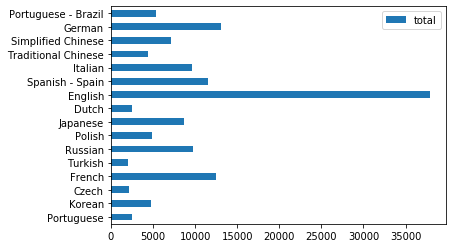

In [30]:
df_l=pd.read_csv('steam_games.csv')
df_l=df_l[['name','popular_tags','languages']].dropna(axis=0)
df_l=df_l.reset_index(drop=True)
df_l.head()

list_data=[]
for i in range(len(df_l)):
    corpus_languages=df_l['languages'][i]
    corpus_languages=corpus_languages.split(',')
    list_data.append(corpus_languages)
list_data
myList = [x for j in list_data for x in j]
myList
myList1=list(set(myList))
myList1                      #所有語言

df_language=df[myList1]

for u in df_language.columns:
    if df_language[u].dtype==bool:
        df_language[u]=df_language[u].astype('int')

df_language_bar=df_language.cumsum()
df_language_bar=df_language_bar.iloc[-1,:].rename("total")
df_language_bar=pd.DataFrame(df_language_bar)
print('total language:',len(myList1 ))
print(df_language_bar[df_language_bar.total>2000].plot.barh(rot=0))

## 所有遊戲tag分佈的條形圖

AxesSubplot(0.125,0.125;0.775x0.755)
total tag: 376


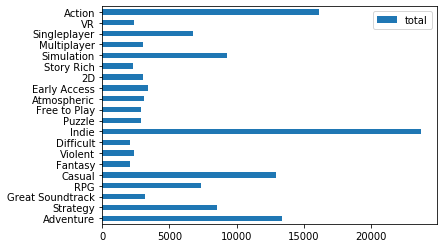

In [33]:
list_data=[]
for i in range(len(df_l)):
    corpus_popular_tags=df_l['popular_tags'][i]
    corpus_popular_tags=corpus_popular_tags.split(',')
    list_data.append(corpus_popular_tags)
list_data
myList = [x for j in list_data for x in j]
myList
myList2=list(set(myList))
myList2                      #所有tag

df_popular_tags=df[myList2]

for u in df_popular_tags.columns:
    if df_popular_tags[u].dtype==bool:
        df_popular_tags[u]=df_popular_tags[u].astype('int')

df_popular_tags_bar=df_popular_tags.cumsum()
df_popular_tags_bar=df_popular_tags_bar.iloc[-1,:].rename("total")
df_popular_tags_bar=pd.DataFrame(df_popular_tags_bar)
print(df_popular_tags_bar[df_popular_tags_bar.total>2000].plot.barh(rot=0))
print('total tag:',len(myList2))

## 把很少出現的tag去除

In [9]:
for u in df.columns:               #把true轉成0和1
    if df[u].dtype==bool:
        df[u]=df[u].astype('int')

df.head()

,#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio,#lang_#lang_spanish*#lang_full_audio,#lang_german;,(all with full audio support),1980s,1990's,2.5D,2D,2D Fighter,360 Video,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
de_colimns=[]
for i in tqdm_notebook(range(len(df.columns))):
    a=df.columns[i]
    a1=df.groupby([a],as_index=False)[a].agg({'cnt':'count'})
    if a1.iloc[-1,1]<10:         #因為全部game都有英文
        de_colimns.append(a)
de_colimns

['#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio',
 '#lang_#lang_spanish*#lang_full_audio',
 '#lang_german;',
 '(all with full audio support)',
 'ATV',
 'Asymmetric VR',
 'Automation',
 'BMX',
 'Bowling',
 'Cycling',
 'Feature Film',
 'Foreign',
 'Hardware',
 'Jet',
 'Skateboarding',
 'Skating',
 'Skiing',
 'Slovakian',
 'Snow',
 'Snowboarding',
 'Spelling',
 'Steam Machine',
 'Transportation',
 'Voice Control']

In [11]:
len(de_colimns)

24

## 篩選後

In [12]:
for i in range(len(de_colimns)):
    b=de_colimns[i]
    df=df.drop(b,axis=1)
df.head()

,1980s,1990's,2.5D,2D,2D Fighter,360 Video,3D,3D Platformer,3D Vision,4 Player Local,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 計算 Support= 0.03

In [13]:
from mlxtend.frequent_patterns import apriori
sup = apriori(df, min_support = 0.03, use_colnames=True)
sup.head()

,support,itemsets
0,0.096789,(2D)
1,0.450778,(Action)
2,0.371805,(Adventure)
3,0.060453,(Anime)
4,0.032533,(Arabic)


## confidence大於0.5

In [14]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(sup, metric="confidence", min_threshold= 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2D),(Action),0.096789,0.450778,0.053834,0.556202,1.233871,0.010204,1.237550
1,(2D),(Adventure),0.096789,0.371805,0.048764,0.503820,1.355065,0.012778,1.266062
2,(2D),(English),0.096789,1.000000,0.096789,1.000000,1.000000,0.000000,inf
3,(2D),(Indie),0.096789,0.624745,0.088374,0.913059,1.461492,0.027906,4.316221
4,(Pixel Graphics),(2D),0.055700,0.096789,0.032779,0.588496,6.080193,0.027388,2.194900
5,(2D),(Singleplayer),0.096789,0.214633,0.064925,0.670789,3.125289,0.044151,2.385607
6,(Adventure),(Action),0.371805,0.450778,0.189775,0.510417,1.132301,0.022174,1.121815
7,(Arcade),(Action),0.043166,0.450778,0.036547,0.846656,1.878210,0.017088,3.581628
8,(Atmospheric),(Action),0.096155,0.450778,0.049574,0.515562,1.143716,0.006229,1.133730
9,(Co-op),(Action),0.051616,0.450778,0.043201,0.836971,1.856726,0.019934,3.368867


## lift 大於0.5

In [15]:
rules = association_rules(sup, metric="lift", min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2D),(Great Soundtrack),0.096789,0.101824,0.036934,0.381593,3.747584,0.027079,1.452404
1,(Great Soundtrack),(2D),0.101824,0.096789,0.036934,0.362725,3.747584,0.027079,1.417301
2,(2D),(Pixel Graphics),0.096789,0.055700,0.032779,0.338669,6.080193,0.027388,1.427877
3,(Pixel Graphics),(2D),0.055700,0.096789,0.032779,0.588496,6.080193,0.027388,2.194900
4,(Singleplayer),(2D),0.214633,0.096789,0.064925,0.302493,3.125289,0.044151,1.294914
5,(2D),(Singleplayer),0.096789,0.214633,0.064925,0.670789,3.125289,0.044151,2.385607
6,(FPS),(Action),0.044363,0.450778,0.042391,0.955556,2.119791,0.022393,12.357492
7,(Action),(FPS),0.450778,0.044363,0.042391,0.094040,2.119791,0.022393,1.054834
8,(Shooter),(Action),0.054257,0.450778,0.053447,0.985075,2.185276,0.028989,36.797866
9,(Action),(Shooter),0.450778,0.054257,0.053447,0.118566,2.185276,0.028989,1.072960


In [16]:
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules['antecedents_len'] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,consequents_len,antecedents_len
0,(2D),(Great Soundtrack),0.096789,0.101824,0.036934,0.381593,3.747584,0.027079,1.452404,1,1
1,(Great Soundtrack),(2D),0.101824,0.096789,0.036934,0.362725,3.747584,0.027079,1.417301,1,1
2,(2D),(Pixel Graphics),0.096789,0.055700,0.032779,0.338669,6.080193,0.027388,1.427877,1,1
3,(Pixel Graphics),(2D),0.055700,0.096789,0.032779,0.588496,6.080193,0.027388,2.194900,1,1
4,(Singleplayer),(2D),0.214633,0.096789,0.064925,0.302493,3.125289,0.044151,1.294914,1,1
5,(2D),(Singleplayer),0.096789,0.214633,0.064925,0.670789,3.125289,0.044151,2.385607,1,1
6,(FPS),(Action),0.044363,0.450778,0.042391,0.955556,2.119791,0.022393,12.357492,1,1
7,(Action),(FPS),0.450778,0.044363,0.042391,0.094040,2.119791,0.022393,1.054834,1,1
8,(Shooter),(Action),0.054257,0.450778,0.053447,0.985075,2.185276,0.028989,36.797866,1,1
9,(Action),(Shooter),0.450778,0.054257,0.053447,0.118566,2.185276,0.028989,1.072960,1,1


## lift大於2 confidence大於0.7

In [17]:
ex02=rules[(rules['confidence'] > 0.7) &
           (rules['lift'] > 2) ]
ex02

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,consequents_len,antecedents_len
6,(FPS),(Action),0.044363,0.450778,0.042391,0.955556,2.119791,0.022393,12.357492,1,1
8,(Shooter),(Action),0.054257,0.450778,0.053447,0.985075,2.185276,0.028989,36.797866,1,1
11,(Story Rich),(Adventure),0.067777,0.371805,0.053834,0.794286,2.136298,0.028634,3.053727,1,1
15,(Arabic),(French),0.032533,0.341208,0.031758,0.976190,2.860980,0.020658,27.669249,1,1
17,(Arabic),(German),0.032533,0.359341,0.031934,0.981602,2.731673,0.020244,34.821707,1,1
19,(Arabic),(Italian),0.032533,0.257200,0.031160,0.957792,3.723917,0.022792,17.598641,1,1
21,(Arabic),(Russian),0.032533,0.280403,0.031125,0.956710,3.411913,0.022002,16.622696,1,1
22,(Arabic),(Spanish - Spain),0.032533,0.313675,0.031934,0.981602,3.129358,0.021730,37.303777,1,1
27,(Atmospheric),(Singleplayer),0.096155,0.214633,0.075488,0.785060,3.657691,0.054850,3.653898,1,1
31,(Co-op),(Multiplayer),0.051616,0.099711,0.038659,0.748977,7.511455,0.033513,3.586476,1,1


## 把全部都是語言的欄過濾 原因結果數量不大於2

In [18]:
from tqdm import tqdm_notebook
df_l=pd.read_csv('steam_games.csv')
df_l=df_l[['name','popular_tags','languages']].dropna(axis=0)
df_l=df_l.reset_index(drop=True)
df_l.head()

list_data=[]
for i in range(len(df_l)):
    corpus_languages=df_l['languages'][i]
    corpus_languages=corpus_languages.split(',')
    list_data.append(corpus_languages)
list_data
myList = [x for j in list_data for x in j]
myList
myList1=list(set(myList))
myList1

ex02=rules[(rules['support'] >= 0.02) &
           (rules['antecedents_len'] <= 2) &
           (rules['consequents_len'] <= 2) &
           (rules['confidence'] > 0.5) &
           (rules['lift'] > 2) ]
ex02=ex02.reset_index(drop=True)

for i in tqdm_notebook(range(len(ex02))):
    a = list(ex02['consequents'][i])
    b = list(ex02['antecedents'][i])
    if list(set(myList1).intersection(set(a))) == [] or list(set(myList1).intersection(set(b))) == []:
        pass
    elif set(list(set(myList1).intersection(set(a)))) == set(a) and  set(list(set(myList1).intersection(set(b)))) == set(b):
        ex02=ex02.drop([i])
ex02

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,consequents_len,antecedents_len
0,(Pixel Graphics),(2D),0.055700,0.096789,0.032779,0.588496,6.080193,0.027388,2.194900,1,1
1,(2D),(Singleplayer),0.096789,0.214633,0.064925,0.670789,3.125289,0.044151,2.385607,1,1
2,(FPS),(Action),0.044363,0.450778,0.042391,0.955556,2.119791,0.022393,12.357492,1,1
3,(Shooter),(Action),0.054257,0.450778,0.053447,0.985075,2.185276,0.028989,36.797866,1,1
4,(Story Rich),(Adventure),0.067777,0.371805,0.053834,0.794286,2.136298,0.028634,3.053727,1,1
5,(Anime),(Japanese),0.060453,0.215055,0.030913,0.511357,2.377793,0.017912,1.606377,1,1
11,(Atmospheric),(Singleplayer),0.096155,0.214633,0.075488,0.785060,3.657691,0.054850,3.653898,1,1
12,(Story Rich),(Atmospheric),0.067777,0.096155,0.035385,0.522078,5.429534,0.028868,1.891197,1,1
13,(Co-op),(Multiplayer),0.051616,0.099711,0.038659,0.748977,7.511455,0.033513,3.586476,1,1
14,(Co-op),(Singleplayer),0.051616,0.214633,0.030315,0.587312,2.736359,0.019236,1.903055,1,1


In [19]:
ex02.to_csv("EX02.csv",index=False)

## support和confidence的分佈圖

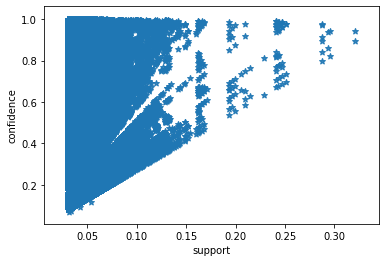

In [20]:
import matplotlib.pyplot as plt
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 把全部都是語言的欄和原因結果數量大於2的欄過濾後

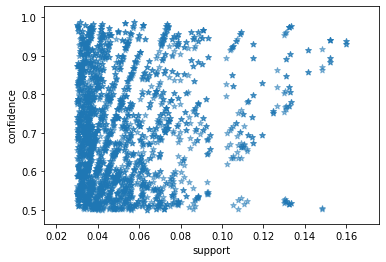

In [21]:
import matplotlib.pyplot as plt
support = ex02['support']
confidence = ex02['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [22]:
len(df.columns)

386

In [23]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(df.columns)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


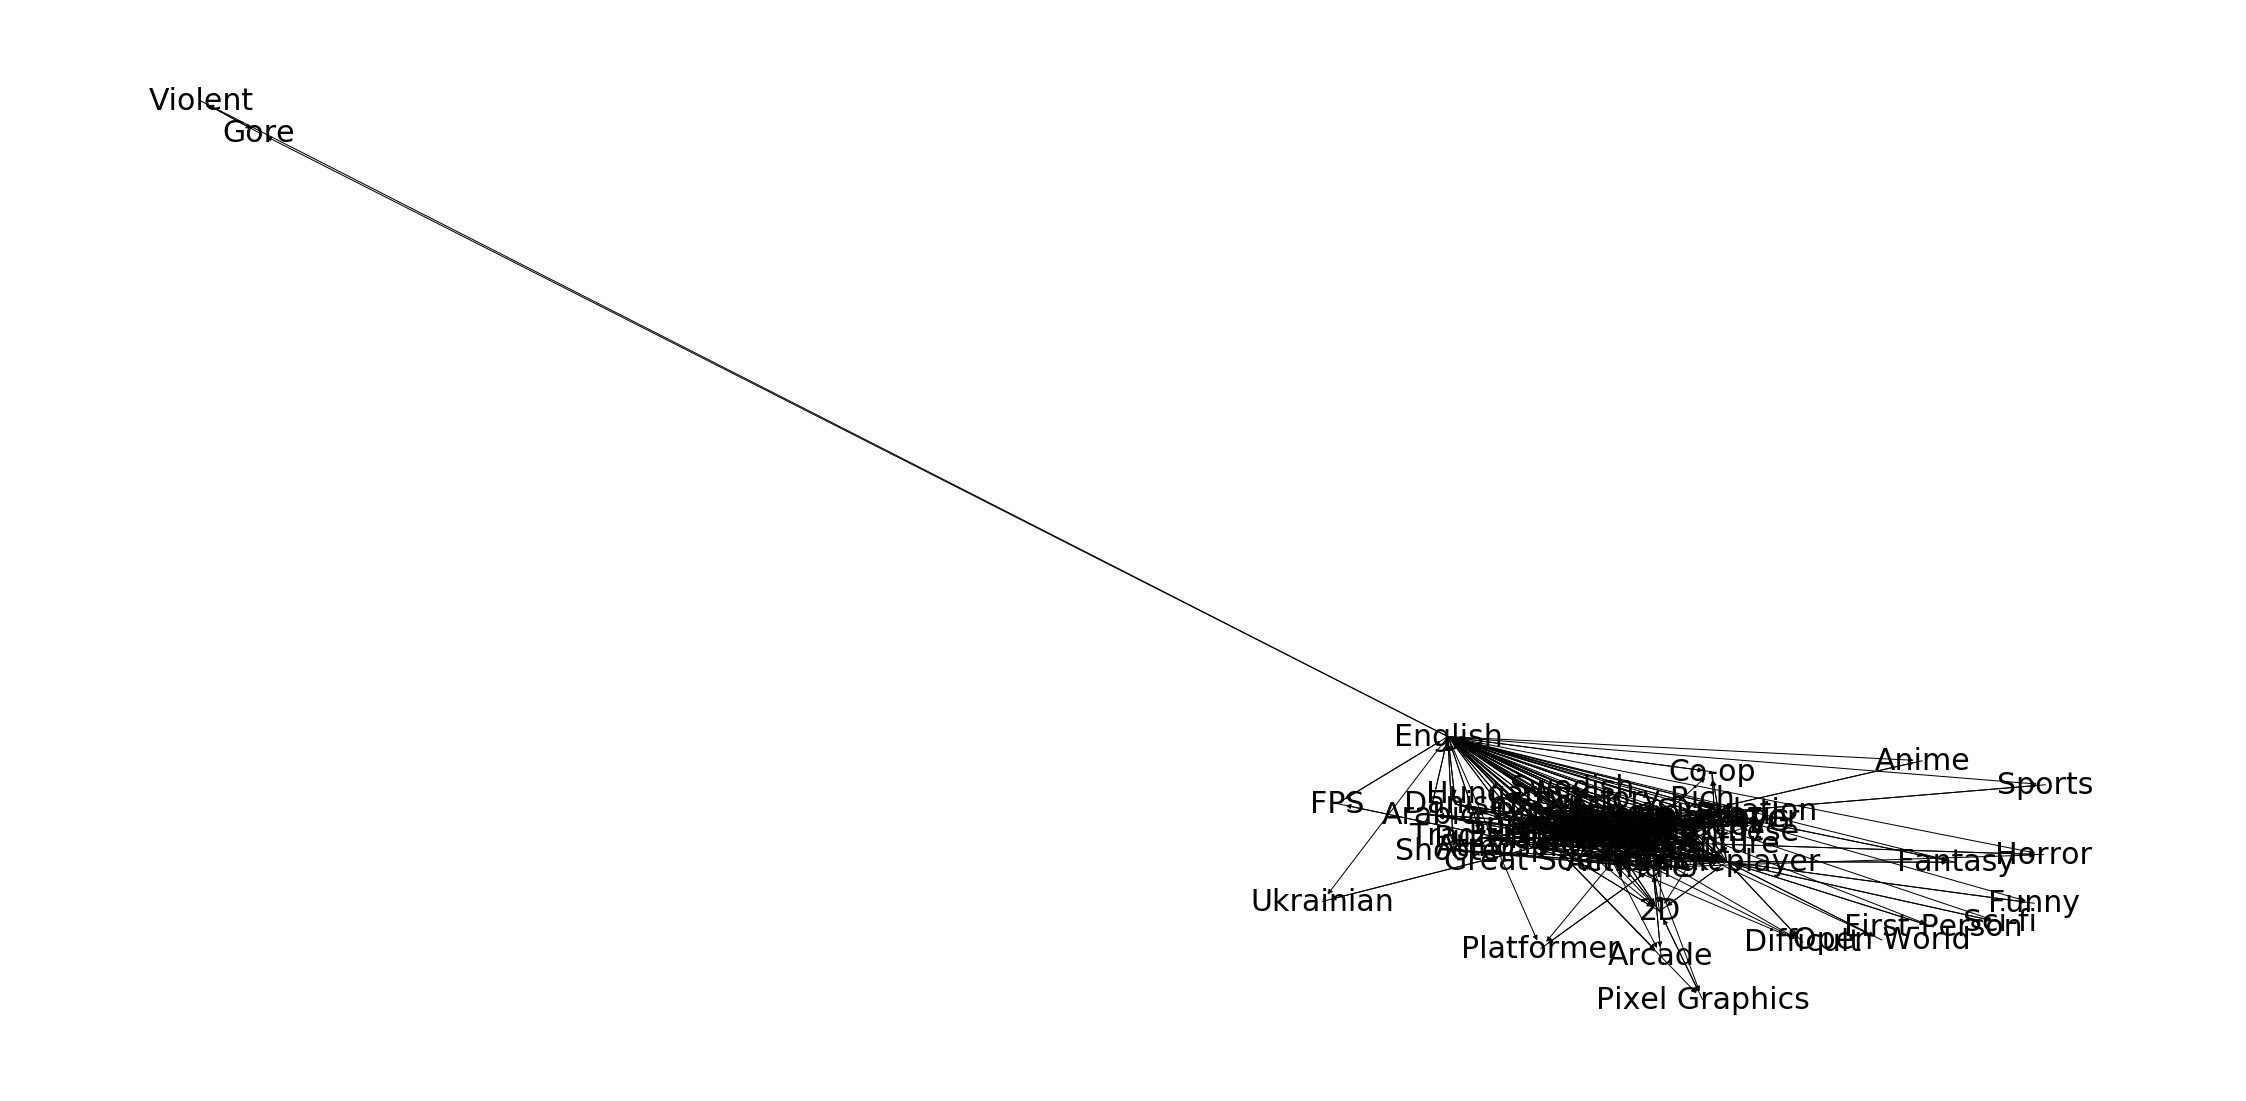

In [24]:
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes

nx.draw_networkx_edges(G, pos, width=1)

# labels
nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [25]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('2D', 'Great Soundtrack'),
 ('Adventure', 'Story Rich'),
 ('FPS', 'Action'),
 ('Fantasy', 'RPG'),
 ('French', 'Arabic'),
 ('German', 'Czech'),
 ('Italian', 'Danish'),
 ('Japanese', 'Anime'),
 ('Korean', 'Polish'),
 ('Multiplayer', 'Co-op'),
 ('Portuguese - Brazil', 'Portuguese'),
 ('Russian', 'Dutch'),
 ('Shooter', 'English'),
 ('Simplified Chinese', 'Traditional Chinese'),
 ('Simulation', 'Sports'),
 ('Singleplayer', 'Atmospheric'),
 ('Spanish - Spain', 'Hungarian'),
 ('Turkish', 'Indie'),
 ('Violent', 'Gore')}

In [26]:
ex02.reset_index(inplace=True)
import networkx as nx
G = nx.DiGraph()
for i in range(len(df.columns)):
    G.add_node(i)
for i in range(len(ex02['antecedents'])):
    currentFrom = list(ex02['antecedents'][i])
    currentTo = list(ex02['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

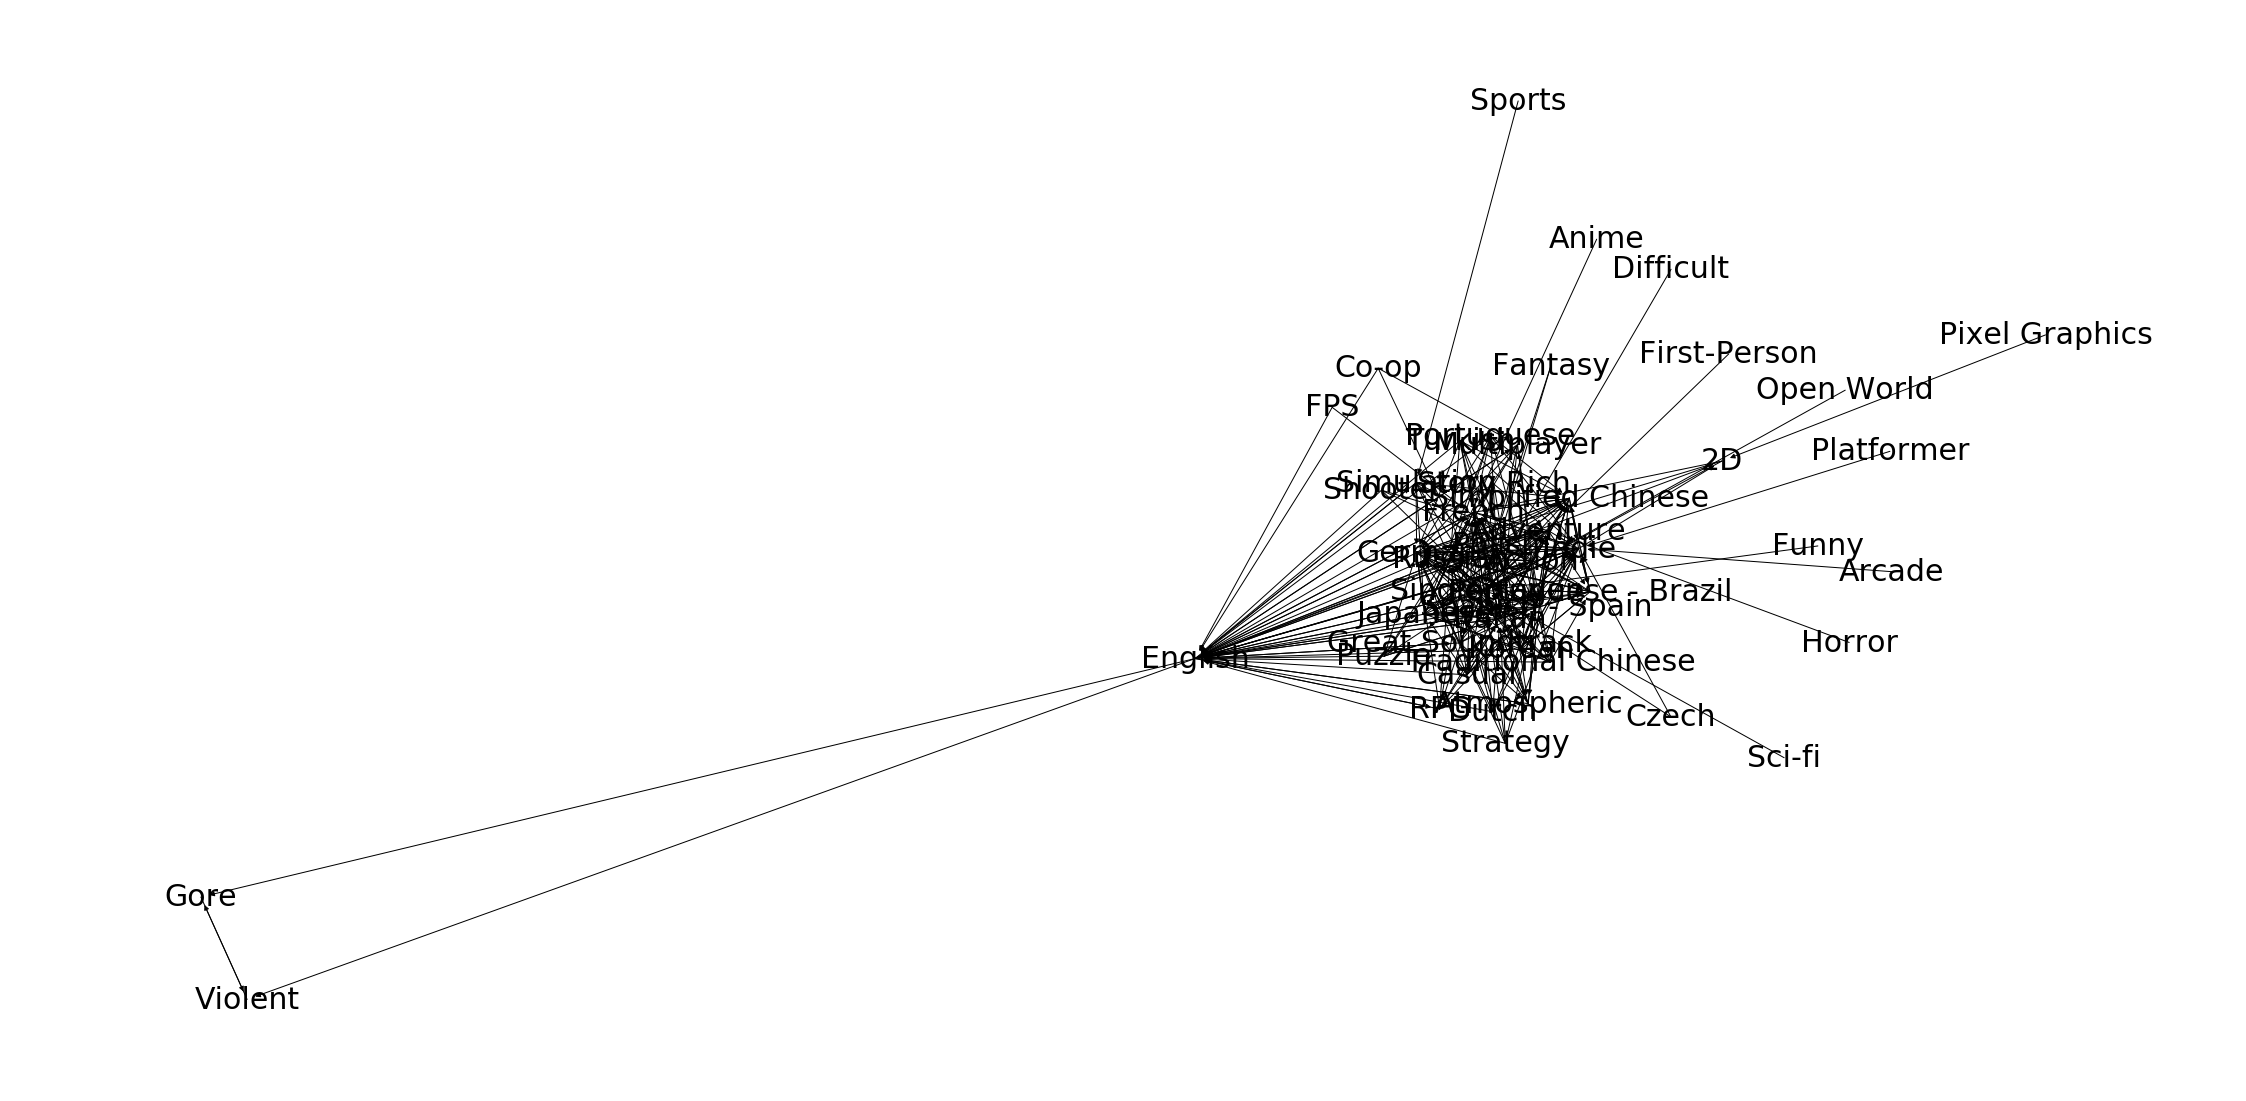

In [27]:
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes

nx.draw_networkx_edges(G, pos, width=1)

# labels
nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [28]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('Anime', 'Japanese'),
 ('Atmospheric', 'German'),
 ('Casual', 'Italian'),
 ('Co-op', 'Multiplayer'),
 ('Dutch', 'Russian'),
 ('FPS', 'English'),
 ('Fantasy', 'RPG'),
 ('Great Soundtrack', 'French'),
 ('Korean', 'Polish'),
 ('Pixel Graphics', '2D'),
 ('Portuguese - Brazil', 'Simplified Chinese'),
 ('Puzzle', 'Spanish - Spain'),
 ('Shooter', 'Indie'),
 ('Singleplayer', 'Action'),
 ('Sports', 'Simulation'),
 ('Story Rich', 'Adventure'),
 ('Violent', 'Gore')}

日本動畫 通常會是 日文  
氛圍 通常會是 德文       例子: 模擬農場17 , GTA V ,fallout 4    
休閒遊戲 通常會是 義大利文   例子: 哆啦A夢 牧場物語 , 煮過頭2 , 星露谷物語  
合作遊戲 通常會是 多人遊戲  
荷蘭文 通常會是 俄語  
第一人稱射擊遊戲 通常會是 英文  
奇幻遊戲 通常會是 角色扮演遊戲  
好評原聲帶 通常會是 法文  
韓文 通常會是 波蘭語  
像素風格 通常會是 2D  
葡萄牙語-巴西 通常會是 簡體中文  
解謎遊戲 通常會是 西班牙語-西班牙  
射擊遊戲 通常會是 獨立遊戲  
單人遊戲 通常會是 動作遊戲  
體育遊戲 通常會是 模擬遊戲  
劇情豐富 通常會是 冒險遊戲  
暴力遊戲 通常會是 血腥  

獨立遊戲 : 指電子遊戲開發者沒有遊戲公司或遊戲發行商提供的薪資，必須獨力負擔開發過程中的所有花費；  
相對而論，開發者可以決定遊戲的走向，做自己想做的遊戲，往往可以推出嶄新觀點的作品，而不用受制於遊戲公司或市場。